<a href="https://colab.research.google.com/github/VivekDubey18/Digit_Recognizing_using_Tensorflow/blob/main/Digit_Recognizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow/Keras version
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



# Normalize input images i.e range is converted [0-255] --> [0-1] to improve performance and stability
x_train = x_train / 255.0
x_test = x_test / 255.0


#Converts the integer labels e.g. 3-> into  --> one-hot vectors  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) to work efficiently with categorical_crossentropy
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),   # Conv Layer 1  (1st layer after input layer)
    MaxPooling2D(pool_size=(2, 2)),                                   # Max Pooling
    Conv2D(64, (3, 3), activation='relu'),                            # Conv Layer 2
    MaxPooling2D(pool_size=(2, 2)),                                   # Max Pooling
    Flatten(),                                                        # Flatten to 1D
    Dense(128, activation='relu'),                                    # Fully connected layer  (total dense layer = 1 that contain 128 neurons)
    Dropout(0.5),                                                     # Dropout for regularization
    Dense(10, activation='softmax')                                   # Output Layer (10 nerons for 10 classes 0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',       # to calculate loss function
              metrics=['accuracy'])                  # to calculate accuracy



#Define callbacks
#it saves the best performing model ignoring the model where accuracy decreases
checkpoint = ModelCheckpoint(
    'best_model.h5', monitor='val_accuracy', save_best_only=True,
    mode='max', verbose=1
)


#to handle overfitting it monitor validation_loss ....ans if validation loss continues for 3 epochs it will terminate and saves the model where the best weights are present
early_stop = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True, verbose=1
)

#Train the model with callbacks
history = model.fit(
    x_train, y_train,
    epochs=8,
    batch_size=32,
    validation_split=0.1,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8538 - loss: 0.4561
Epoch 1: val_accuracy improved from -inf to 0.98533, saving model to best_model.h5


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8539 - loss: 0.4559 - val_accuracy: 0.9853 - val_loss: 0.0498
Epoch 2/8
1682/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9706 - loss: 0.0944
Epoch 2: val_accuracy improved from 0.98533 to 0.98767, saving model to best_model.h5


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9706 - loss: 0.0944 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 3/8
1680/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.0679
Epoch 3: val_accuracy improved from 0.98767 to 0.99033, saving model to best_model.h5


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9800 - loss: 0.0678 - val_accuracy: 0.9903 - val_loss: 0.0341
Epoch 4/8
1677/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0533
Epoch 4: val_accuracy improved from 0.99033 to 0.99050, saving model to best_model.h5


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9835 - loss: 0.0532 - val_accuracy: 0.9905 - val_loss: 0.0340
Epoch 5/8
1680/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0395
Epoch 5: val_accuracy improved from 0.99050 to 0.99200, saving model to best_model.h5


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9880 - loss: 0.0395 - val_accuracy: 0.9920 - val_loss: 0.0305
Epoch 6/8
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9888 - loss: 0.0374
Epoch 6: val_accuracy improved from 0.99200 to 0.99233, saving model to best_model.h5


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9888 - loss: 0.0374 - val_accuracy: 0.9923 - val_loss: 0.0297
Epoch 7/8
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9901 - loss: 0.0317
Epoch 7: val_accuracy did not improve from 0.99233
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9901 - loss: 0.0317 - val_accuracy: 0.9913 - val_loss: 0.0353
Epoch 8/8
1685/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9919 - loss: 0.0267
Epoch 8: val_accuracy improved from 0.99233 to 0.99283, saving model to best_model.h5


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0267 - val_accuracy: 0.9928 - val_loss: 0.0311
Restoring model weights from the end of the best epoch: 6.


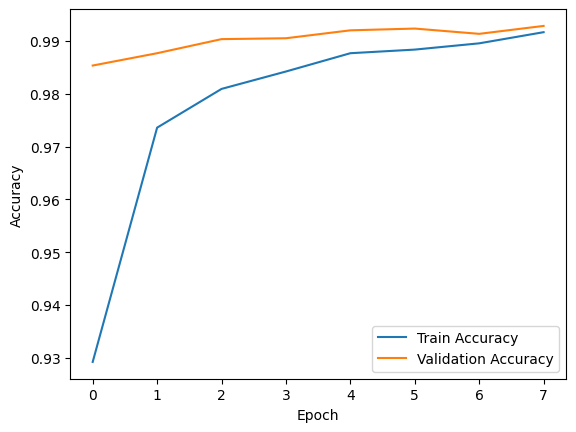

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0309
Test accuracy : 0.9914


In [4]:
#Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy : {test_acc:.4f}")